<a href="https://colab.research.google.com/github/DaveMatNat/breast-cancer-ml/blob/main/Breast_Cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=blue>1 Import Modules


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#<font color=blue>2. Data Preparationn

In [28]:
def link_conv(url):
  return 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [29]:
url1='https://drive.google.com/file/d/1uUDXa90lPBGozLXNZtIL9NVD2uvl2pnB/view?usp=sharing'
url=link_conv(url1)

df = pd.read_csv(url)
df.shape

(616, 11)

In [30]:
url2 = 'https://drive.google.com/file/d/1hZHWOp93xMpt8Ir4Fv2bBk-lPkeA7CEG/view?usp=sharing'
link2 = link_conv(url2)
testdata = pd.read_csv(link2)
testdata.shape

(100, 11)

In [31]:
df.head(15)

,code_number,ClumpThickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,704168,4,6,5,6,7,NaN,4,9,1,2
1,733639,3,1,1,1,2,NaN,3,1,1,2
2,1096800,6,6,6,9,6,NaN,7,8,1,4
3,1183246,1,1,1,1,1,NaN,2,1,1,2
4,1184840,1,1,3,1,2,NaN,2,1,1,2
5,1193683,1,1,2,1,3,NaN,1,1,1,2
6,1197510,5,1,1,1,2,NaN,3,1,1,2
7,1238464,1,1,1,1,1,NaN,2,1,1,2
8,1241232,3,1,4,1,2,NaN,3,1,1,2
9,640744,10,10,10,7,9,10.0,7,10,10,4


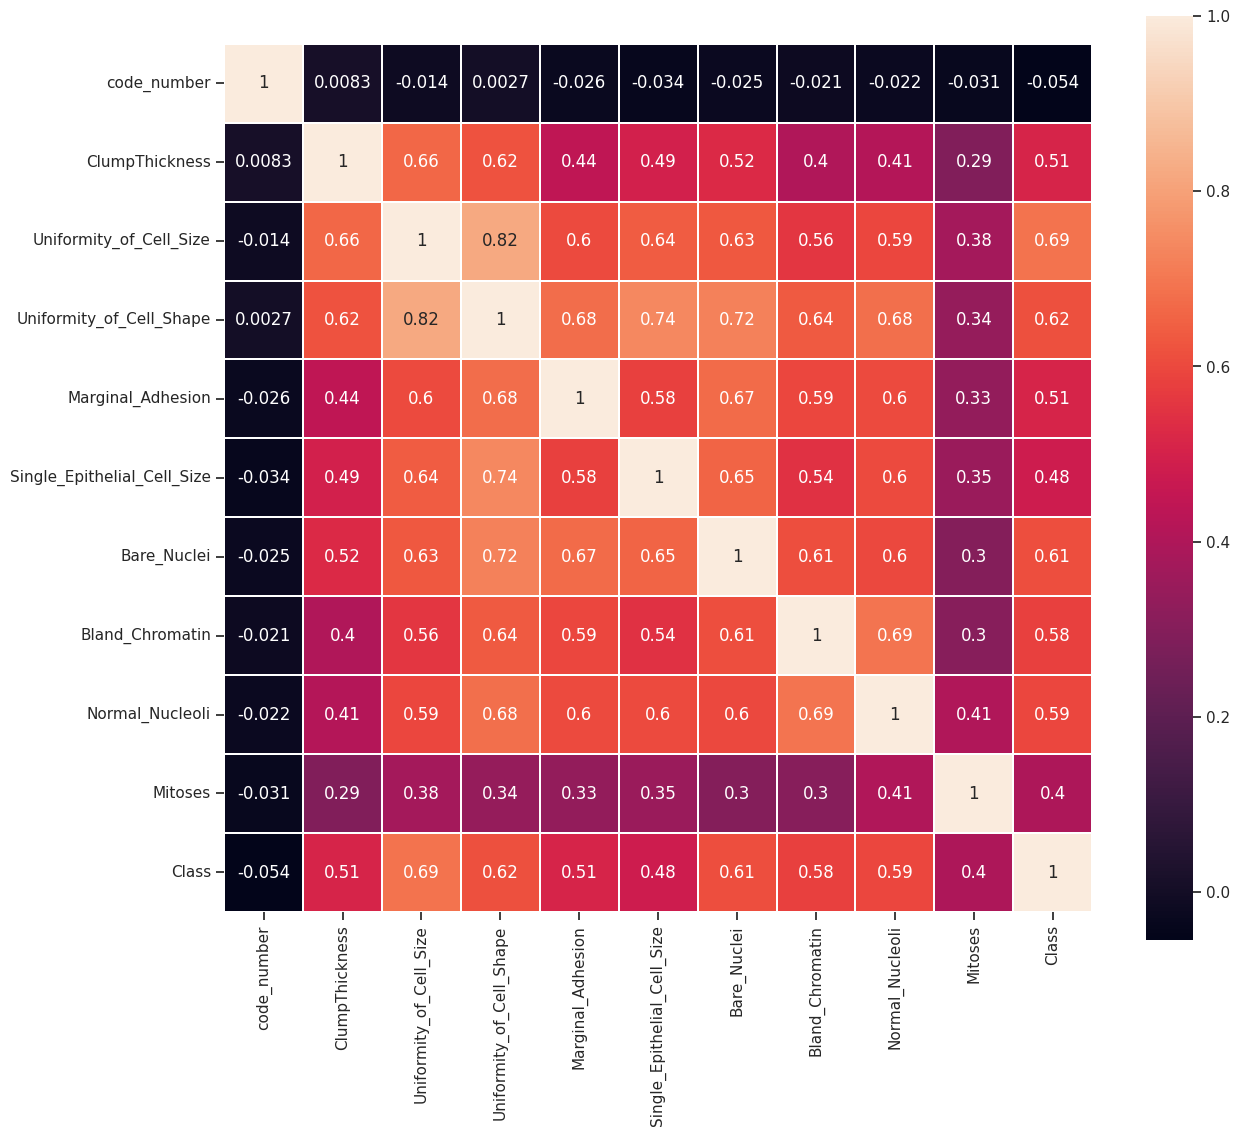

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(df.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()

In [33]:
df.tail(15)

,code_number,ClumpThickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
601,1352848,1,1,1,1,1,1.0,7,4,1,4
602,1353092,3,2,1,2,2,1.0,3,1,1,2
603,1354840,2,1,1,1,2,1.0,3,1,1,2
604,1354840,5,3,2,1,3,1.0,1,1,1,2
605,1355260,1,1,1,1,2,1.0,2,1,1,2
606,1365075,4,1,4,1,2,1.0,1,1,1,2
607,1365328,1,1,2,1,2,1.0,2,1,1,2
608,1368267,5,1,1,1,2,1.0,1,1,1,2
609,1368273,1,1,1,1,2,1.0,1,1,1,2
610,1368882,2,1,1,1,2,1.0,1,1,1,2


In [34]:
df.columns.unique()

Index(['code_number', 'ClumpThickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [35]:
xtrain = df[['ClumpThickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']]
ytrain = df[['Class']]

# **CLEAN**


In [36]:
xtrain['Bare_Nuclei'][0:9] = 10.0
xtrain['Bare_Nuclei'][614] = 10.0
xtrain['Bare_Nuclei'][615] = 1.0

<ipython-input-36-7ede565f6512>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  xtrain['Bare_Nuclei'][0:9] = 10.0
<ipython-input-36-7ede565f6512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [37]:
xtrain[xtrain.isnull().any(axis=1)]

,ClumpThickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses


#<font color=blue>3. Split Data (Train & Validate)

In [38]:
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, train_size=0.8)

In [39]:
xtrain.shape , xval.shape

((492, 9), (124, 9))

#<font color=blue>4. Initialize and train model

In [62]:
models = {'tree':DecisionTreeClassifier(),
'KNN':KNeighborsClassifier(n_neighbors=1),
'svm': SVC(),
'ranforest': RandomForestClassifier(),
'NB': GaussianNB(),
'logistic': LogisticRegression()}


In [63]:
for model,mod in models.items():
  mod.fit(xtrain, ytrain)




/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

#<font color=blue>5. Evaluate Model

In [64]:
from sklearn.metrics import classification_report

In [70]:
for name in models.keys():
  print(name.upper())
  m = models[name]
  y_predict = m.predict(xval)
  print(classification_report(yval , y_predict))

TREE
              precision    recall  f1-score   support

           2       0.91      0.99      0.95        72
           4       0.98      0.87      0.92        52

    accuracy                           0.94       124
   macro avg       0.94      0.93      0.93       124
weighted avg       0.94      0.94      0.93       124

KNN
              precision    recall  f1-score   support

           2       0.87      0.99      0.92        72
           4       0.98      0.79      0.87        52

    accuracy                           0.90       124
   macro avg       0.92      0.89      0.90       124
weighted avg       0.91      0.90      0.90       124

SVM
              precision    recall  f1-score   support

           2       0.87      1.00      0.93        72
           4       1.00      0.79      0.88        52

    accuracy                           0.91       124
   macro avg       0.93      0.89      0.91       124
weighted avg       0.92      0.91      0.91       124

RANFOR

Text(46.25, 0.5, 'Actual Values ')

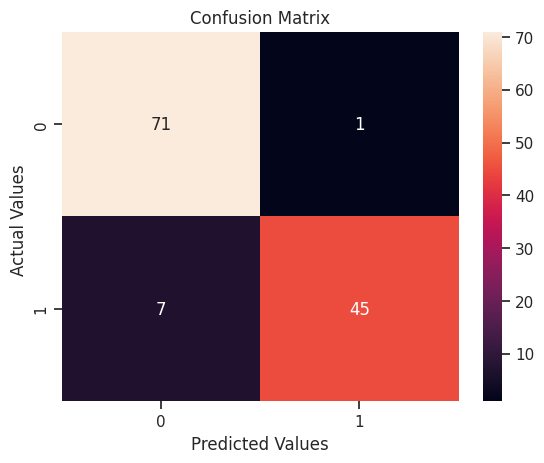

In [72]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

m = models['tree']
y_predict = m.predict(xval)

cf = confusion_matrix(yval , y_predict)
plt = sb.heatmap(cf, annot=True)
plt.set_title('Confusion Matrix');
plt.set_xlabel('Predicted Values')
plt.set_ylabel('Actual Values ')

#<font color=blue>6. Test with new Data

In [73]:
xtest = testdata[['ClumpThickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']]

# **CLEAN**

In [74]:
xtest

,ClumpThickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,4,3,1,2,0.0,2,3,1
1,3,1,1,1,2,NaN,3,1,1
2,3,1,3,1,2,NaN,2,1,1
3,8,8,8,1,2,NaN,6,10,1
4,1,1,1,1,2,NaN,2,1,1
...,...,...,...,...,...,...,...,...,...
95,3,1,1,4,3,1.0,2,2,1
96,1,1,1,1,2,1.0,3,1,1
97,1,1,1,1,2,1.0,3,1,1
98,7,5,1,1,1,1.0,1,1,1


In [75]:
x = xtest['Bare_Nuclei']
x[x.isnull()]

,Bare_Nuclei
1,NaN
2,NaN
3,NaN
4,NaN


In [76]:
xtest.loc[1,'Bare_Nuclei'] = 1
xtest.loc[2,'Bare_Nuclei'] = 1
xtest.loc[3,'Bare_Nuclei'] = 9
xtest.loc[4,'Bare_Nuclei'] = 1

# **PREDICT**

In [77]:
testdata['Class'] = m.predict(xtest)
testdata

,code_number,ClumpThickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,a001,5,4,3,1,2,0.0,2,3,1,2
1,a011,3,1,1,1,2,NaN,3,1,1,2
2,a041,3,1,3,1,2,NaN,2,1,1,2
3,a071,8,8,8,1,2,NaN,6,10,1,4
4,a076,1,1,1,1,2,NaN,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
95,a092,3,1,1,4,3,1.0,2,2,1,2
96,a094,1,1,1,1,2,1.0,3,1,1,2
97,a095,1,1,1,1,2,1.0,3,1,1,2
98,a097,7,5,1,1,1,1.0,1,1,1,4


In [78]:
export = testdata[['code_number','Class']]
export

,code_number,Class
0,a001,2
1,a011,2
2,a041,2
3,a071,4
4,a076,2
...,...,...
95,a092,2
96,a094,2
97,a095,2
98,a097,4


# **EXPORT**

In [52]:
export.to_csv('ns.csv', index=False)